In this notebok, we have performed preprocessing on the dataset, test the dataset for stationarity using plots and ADFuller tests. Finally constructed the ARIMA, ARIMAX and SARIMAX models for forecasting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [73]:
dataset=pd.read_excel('Datasets/Final Data.xlsx')
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

In [74]:
'''
Displaying first five rows of the final dataset that was prepared
'''

dataset.head()

date state       revenue        demand  occupancy  year  month  day  \
0 2013-01-01    NY  2.442363e+06  13063.675000  81.991307  2013      1    1   
1 2013-01-02    NY  2.018559e+06  13069.608539  82.028548  2013      1    2   
2 2013-01-03    NY  1.927676e+06  13069.608539  82.028548  2013      1    3   
3 2013-01-04    NY  1.781664e+06  12653.271887  79.415502  2013      1    4   
4 2013-01-05    NY  1.824994e+06  12827.322364  80.507892  2013      1    5   

   fips  cases  deaths  dailynewcases  dailynewdeaths  
0     0      0       0              0               0  
1     0      0       0              0               0  
2     0      0       0              0               0  
3     0      0       0              0               0  
4     0      0       0              0               0

In [75]:
dataset.shape

(2861, 13)

# Exploratory Data Analysis and Preprocessing

In [76]:
'''
The dataset was collected over a period of 8 years from 2013 to 2020
'''

print('Different years across which data was recorded:',dataset.year.unique())

Different years across which data was recorded: [2013 2014 2015 2016 2017 2018 2019 2020]


In [77]:
print('Spatial distribution of the dataset:',dataset.state.unique())

Spatial distribution of the dataset: ['NY']


In [78]:
'''
Checking for null values in each column which is zero for each column
'''

dataset.isna().sum()

date              0
state             0
revenue           0
demand            0
occupancy         0
year              0
month             0
day               0
fips              0
cases             0
deaths            0
dailynewcases     0
dailynewdeaths    0
dtype: int64

In [79]:
'''
Displaying the correlation of the occupancy column
'''

dataset.corr().occupancy.sort_values()

fips             -0.802043
cases            -0.713680
deaths           -0.702670
dailynewcases    -0.564536
dailynewdeaths   -0.417706
year             -0.384319
day              -0.005300
month             0.227164
revenue           0.814697
demand            0.855191
occupancy         1.000000
Name: occupancy, dtype: float64

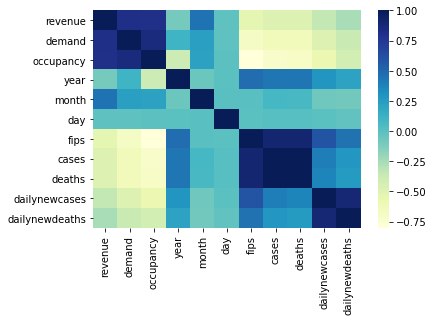

In [80]:
'''
Plotting the heatmap using seaborn
'''

heatmap = sns.heatmap(dataset.corr(),cmap='YlGnBu')

In [81]:
'''
Dropping the unnecessary columns based on the correlation matrix
'''

dataset.drop(['state','fips','dailynewcases','dailynewdeaths','deaths'],axis=1,inplace=True)
dataset.head()

date       revenue        demand  occupancy  year  month  day  cases
0 2013-01-01  2.442363e+06  13063.675000  81.991307  2013      1    1      0
1 2013-01-02  2.018559e+06  13069.608539  82.028548  2013      1    2      0
2 2013-01-03  1.927676e+06  13069.608539  82.028548  2013      1    3      0
3 2013-01-04  1.781664e+06  12653.271887  79.415502  2013      1    4      0
4 2013-01-05  1.824994e+06  12827.322364  80.507892  2013      1    5      0

In [82]:
'''
setting the date column as index column
'''

dataset=dataset.set_index('date')

In [83]:
dataset.head()

revenue        demand  occupancy  year  month  day  cases
date                                                                      
2013-01-01  2.442363e+06  13063.675000  81.991307  2013      1    1      0
2013-01-02  2.018559e+06  13069.608539  82.028548  2013      1    2      0
2013-01-03  1.927676e+06  13069.608539  82.028548  2013      1    3      0
2013-01-04  1.781664e+06  12653.271887  79.415502  2013      1    4      0
2013-01-05  1.824994e+06  12827.322364  80.507892  2013      1    5      0

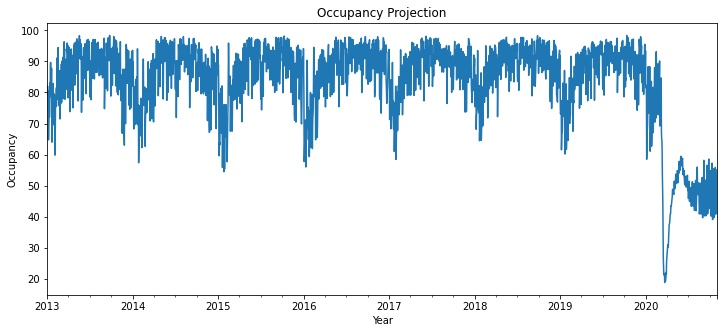

In [84]:
'''
Plotting the time series of occupancy
'''

mp.figure(figsize=(12,5))
dataset.occupancy.plot()
mp.xlabel('Year')
mp.ylabel('Occupancy')
mp.title('Occupancy Projection')
mp.show()

<Figure size 864x864 with 0 Axes>

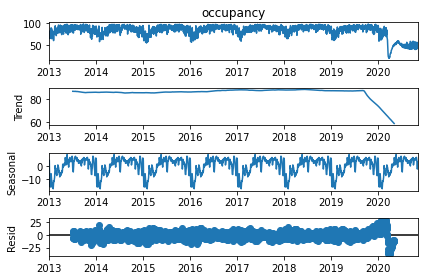

In [85]:
'''
Seasonal decomposition of occupancy data
'''

mp.figure(figsize = (12,12))
seasonal_decompose(dataset.occupancy, model='additive', period=365).plot()
mp.show()

In [87]:
'''
Scaling the datatset to bring the values of each column on the same scale
'''

scaler = MinMaxScaler()
model=scaler.fit(dataset[['revenue','demand','occupancy','month','day','cases']])
scaled_data=model.transform(dataset[['revenue','demand','occupancy','month','day','cases']])
dataset[['revenue','demand','occupancy','month','day','cases']]=scaled_data

In [88]:
dataset.head()

revenue    demand  occupancy  year  month       day  cases
date                                                                   
2013-01-01  0.252131  0.460923   0.793919  2013    0.0  0.000000    0.0
2013-01-02  0.194486  0.461239   0.794387  2013    0.0  0.033333    0.0
2013-01-03  0.182125  0.461239   0.794387  2013    0.0  0.066667    0.0
2013-01-04  0.162264  0.439074   0.761537  2013    0.0  0.100000    0.0
2013-01-05  0.168158  0.448340   0.775270  2013    0.0  0.133333    0.0

In [89]:
'''
Splitting the dataset into train and test
'''

train_dataset = dataset[dataset.year != 2019]
test_dataset = dataset[dataset.year == 2019]

In [90]:
'''
Performing the stationarity test using adfuller test
'''

adf_test = adfuller(dataset.occupancy)
print(f'p-value: {adf_test[1]}')

p-value: 0.0733452767750241


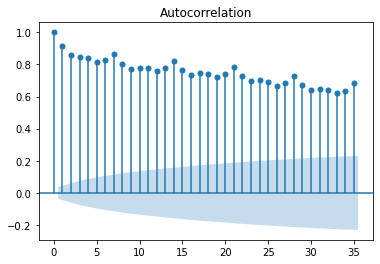

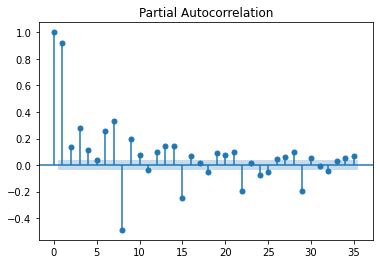

In [91]:
'''
ACF and PACF plots
'''

acf_original = plot_acf(dataset.occupancy)
pacf_original = plot_pacf(dataset.occupancy)

# Model construction, training and testing

In [92]:
'''
Constructing the ARIMA(1,0,1) model and training at 100 iterations
& 
Priting the model summary
'''

model_ARIMA = ARIMA(train_dataset.occupancy, order=(1,0,1))
model_fit_ARIMA = model_ARIMA.fit(method_kwargs={'maxiter':100})
print(model_fit_ARIMA.summary())

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:              occupancy   No. Observations:                 2496
Model:                 ARIMA(1, 0, 1)   Log Likelihood                3090.245
Date:                Sun, 15 Jan 2023   AIC                          -6172.489
Time:                        03:11:01   BIC                          -6149.199
Sample:                             0   HQIC                         -6164.033
                               - 2496                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8030      0.038     21.335      0.000       0.729       0.877
ar.L1          0.9744      0.006    166.513      0.000       0.963       0.986
ma.L1         -0.4147      0.019    -22.373      0.0

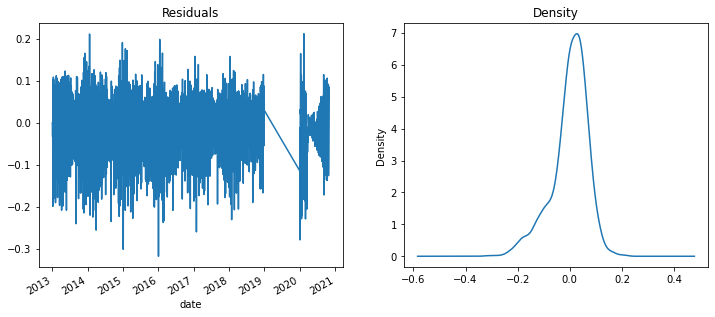

In [93]:
'''
Plotting the residuals of the fitted model
'''

residuals = model_fit_ARIMA.resid[1:]
fig, ax = mp.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0],figsize=(12,5))
residuals.plot(title='Density', kind='kde', ax=ax[1])
mp.show()

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-94-9cafd124d0a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['forecast_ARIMA'] = list(forecast_test)


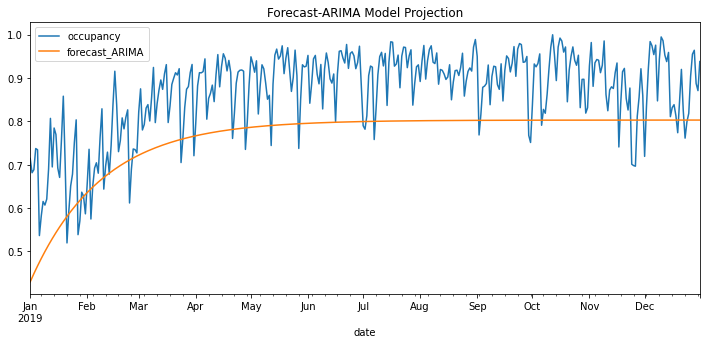

In [94]:
'''
Testing and plotting the model
'''

forecast_test = model_fit_ARIMA.forecast(len(test_dataset.occupancy))
test_dataset['forecast_ARIMA'] = list(forecast_test)
test_dataset.head()
mp.figure(figsize=(12,5))
test_dataset.occupancy.plot(legend=True)
test_dataset.forecast_ARIMA.plot(legend=True)
mp.title('Forecast-ARIMA Model Projection')
mp.show()

In [97]:
'''
Constructing the ARIMAX(1,0,1) model and training at 120 iterations
&
Printing the model summary
'''

model_ARIMAX = ARIMA(train_dataset.occupancy, exog=train_dataset[['revenue','demand','month','day','cases']], order=(1,0,1))
model_fit_ARIMAX = model_ARIMAX.fit(method_kwargs={'maxiter':120})
print(model_fit_ARIMAX.summary())

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

                               SARIMAX Results                                
Dep. Variable:              occupancy   No. Observations:                 2496
Model:                 ARIMA(1, 0, 1)   Log Likelihood                8570.875
Date:                Sun, 15 Jan 2023   AIC                         -17123.750
Time:                        03:11:34   BIC                         -17071.348
Sample:                             0   HQIC                        -17104.724
                               - 2496                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5747      0.854     -0.673      0.501      -2.248       1.099
revenue       -0.0077      0.003     -2.543      0.011      -0.014      -0.002
demand         1.2290      0.003    427.706      0.0

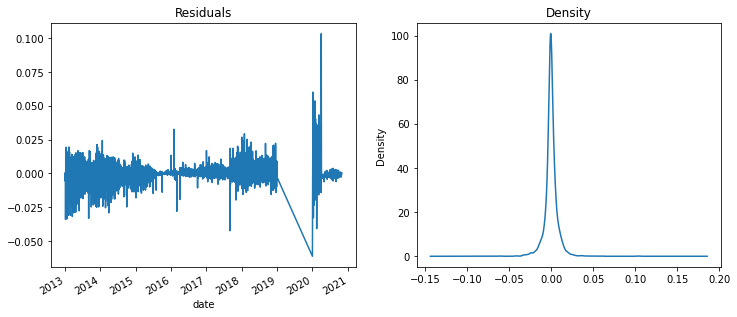

In [98]:
'''
Plottin residuals of the fitted ARIMAX model
'''

residuals = model_fit_ARIMAX.resid[1:]
fig, ax = mp.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0],figsize=(12,5))
residuals.plot(title='Density', kind='kde', ax=ax[1])
mp.show()

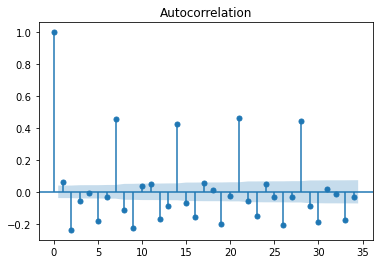

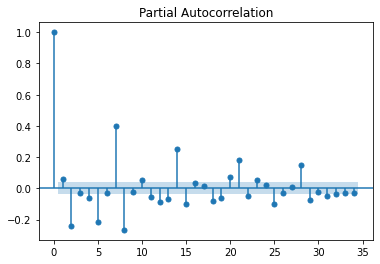

In [99]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-100-da8494dadb1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['forecast_ARIMAX'] = list(forecast_test)


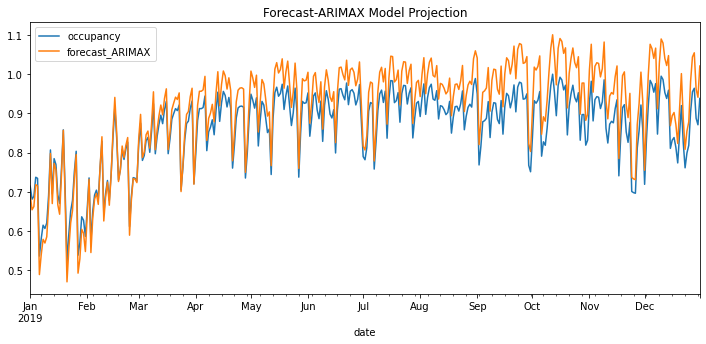

In [100]:
'''
Forecasting and plotting the predictions made by ARIMAX model
'''

forecast_test = model_fit_ARIMAX.forecast(len(test_dataset.occupancy),exog=test_dataset[['revenue','demand','month','day','cases']])
test_dataset['forecast_ARIMAX'] = list(forecast_test)
test_dataset.head()
mp.figure(figsize=(12,5))
test_dataset.occupancy.plot(legend=True)
test_dataset.forecast_ARIMAX.plot(legend=True)
mp.title('Forecast-ARIMAX Model Projection')
mp.show()

In [110]:
'''
Constructing the SARIMAX model and training it at 180 iterations
&
Printing the model summary
'''

model_SARIMAX = ARIMA(dataset.occupancy, exog=dataset[['revenue','demand','month','day','cases']], order=(1,0,1),seasonal_order=(1,0,1,12))
model_fit_SARIMAX = model_SARIMAX.fit(method_kwargs={'maxiter':180})
print(model_fit_SARIMAX.summary())

C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                                    SARIMAX Results                                     
Dep. Variable:                        occupancy   No. Observations:                 2861
Model:             ARIMA(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                9668.821
Date:                          Sun, 15 Jan 2023   AIC                         -19315.643
Time:                                  03:19:51   BIC                         -19250.094
Sample:                              01-01-2013   HQIC                        -19292.008
                                   - 10-31-2020                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3566      0.093     -3.834      0.000      -0.539      -0.174
revenue       -0.0179      0.003     -7.042      0.

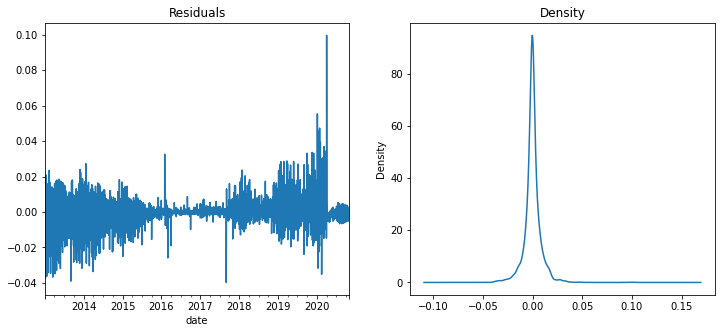

In [111]:
'''
Plotting residuals for fitted SARIMAX model
'''

residuals = model_fit_SARIMAX.resid[1:]
fig, ax = mp.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0],figsize = (12,5))
residuals.plot(title='Density', kind='kde', ax=ax[1])
mp.show()

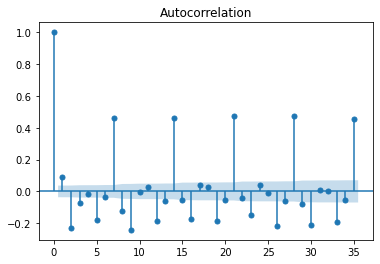

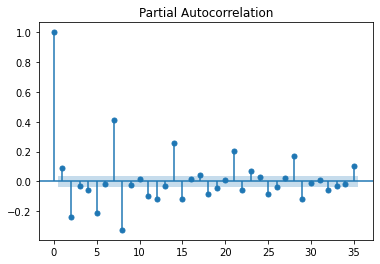

In [112]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

<ipython-input-137-efe163c0ea3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['forecast_SARIMAX'] = list(forecast_test)


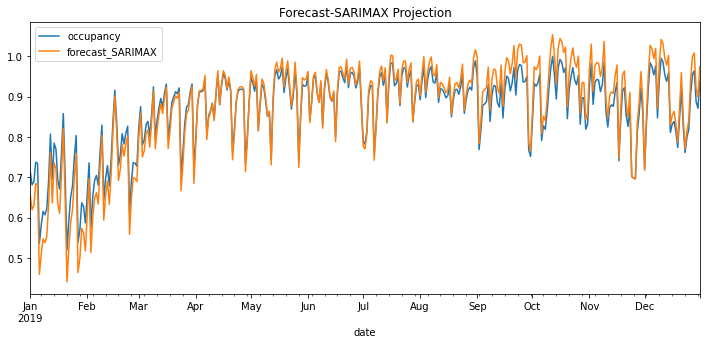

In [137]:
'''
Forecasting and plotting the predictions of SARIMAX model
'''

forecast_test = model_fit_SARIMAX.forecast(len(test_dataset.occupancy),exog=test_dataset[['revenue','demand','month','day','cases']])
test_dataset['forecast_SARIMAX'] = list(forecast_test)
test_dataset.head()
mp.figure(figsize=(12,5))
test_dataset.occupancy.plot(legend=True)
test_dataset.forecast_SARIMAX.plot(legend=True)
mp.title('Forecast-SARIMAX Projection')
mp.show()

In [114]:
'''
Test dataset after forecasting
'''

test_dataset.head()

revenue    demand  occupancy  year  month       day  cases  \
date                                                                      
2019-01-01  0.286847  0.650977   0.714437  2019    0.0  0.000000    0.0   
2019-01-02  0.209300  0.620337   0.681523  2019    0.0  0.033333    0.0   
2019-01-03  0.198743  0.626929   0.688604  2019    0.0  0.066667    0.0   
2019-01-04  0.214942  0.672282   0.737323  2019    0.0  0.100000    0.0   
2019-01-05  0.214912  0.669698   0.734547  2019    0.0  0.133333    0.0   

            forecast_ARIMA  forecast_ARIMAX  forecast_SARIMAX  
date                                                           
2019-01-01        0.430007         0.691487          0.656674  
2019-01-02        0.439546         0.654484          0.619961  
2019-01-03        0.448842         0.662724          0.629920  
2019-01-04        0.457899         0.718395          0.684221  
2019-01-05        0.466725         0.715277          0.681504

# MODEL EVALUATION 

In [141]:
'''
Evaluation of ARIMA Model
'''

mse_ARIMA = mean_squared_error(test_dataset.occupancy,test_dataset.forecast_ARIMA)
mae_ARIMA = mean_absolute_error(test_dataset.occupancy,test_dataset.forecast_ARIMA)
rmse_ARIMA = np.sqrt(mse_ARIMA)
mape_ARIMA = np.mean(np.abs(test_dataset.occupancy - test_dataset.forecast_ARIMA)/(test_dataset.occupancy))*100

In [142]:
mse_ARIMA

0.0153213837407714

In [143]:
rmse_ARIMA

0.12377957723619595

In [144]:
mae_ARIMA

0.1102558883519583

In [145]:
mape_ARIMA

12.530466165777183

In [135]:
'''
Evaluation of ARIMAX Model
'''

mse_ARIMAX = mean_squared_error(test_dataset.occupancy,test_dataset.forecast_ARIMAX)
mae_ARIMAX = mean_absolute_error(test_dataset.occupancy,test_dataset.forecast_ARIMAX)
rmse_ARIMAX = np.sqrt(mse_ARIMAX)
mape_ARIMAX = np.mean(np.abs(test_dataset.occupancy - test_dataset.forecast_ARIMAX)/(test_dataset.occupancy))*100

In [130]:
mse_ARIMAX

0.0032718441422010308

In [131]:
rmse_ARIMAX

0.057200036208039505

In [132]:
mae_ARIMAX

0.05126511617306655

In [136]:
mape_ARIMAX

5.785784156727821

In [133]:
'''
Evaluation of SARIMAX Model
'''

mse_SARIMAX = mean_squared_error(test_dataset.occupancy,test_dataset.forecast_SARIMAX)
mae_SARIMAX = mean_absolute_error(test_dataset.occupancy,test_dataset.forecast_SARIMAX)
rmse_SARIMAX = np.sqrt(mse_SARIMAX)
mape_SARIMAX = np.mean(np.abs(test_dataset.occupancy - test_dataset.forecast_SARIMAX)/(test_dataset.occupancy))*100

In [126]:
mse_SARIMAX

0.0010029742376974785

In [127]:
rmse_SARIMAX

0.03166976851348109

In [128]:
mae_SARIMAX

0.026032255078574353

In [134]:
mape_SARIMAX

3.187540547248296